### Logistic regression hands on tutorial

##### Frågan vi vill svara på:

Finns det ett samband mellan hur mycket skuld (balance) en person har på sitt kreditkort och om de riskerar att gå i default (inte betala tillbaka)?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("../../data/Default.csv")

df.head()


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308386,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462903,34552.644802,43807.729272,73554.233495


In [5]:
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [6]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

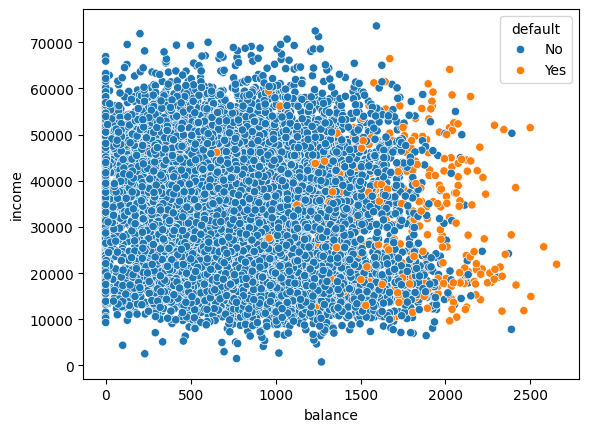

In [7]:
sns.scatterplot(data = df, x = "balance", y= "income", hue = "default") # hue => color

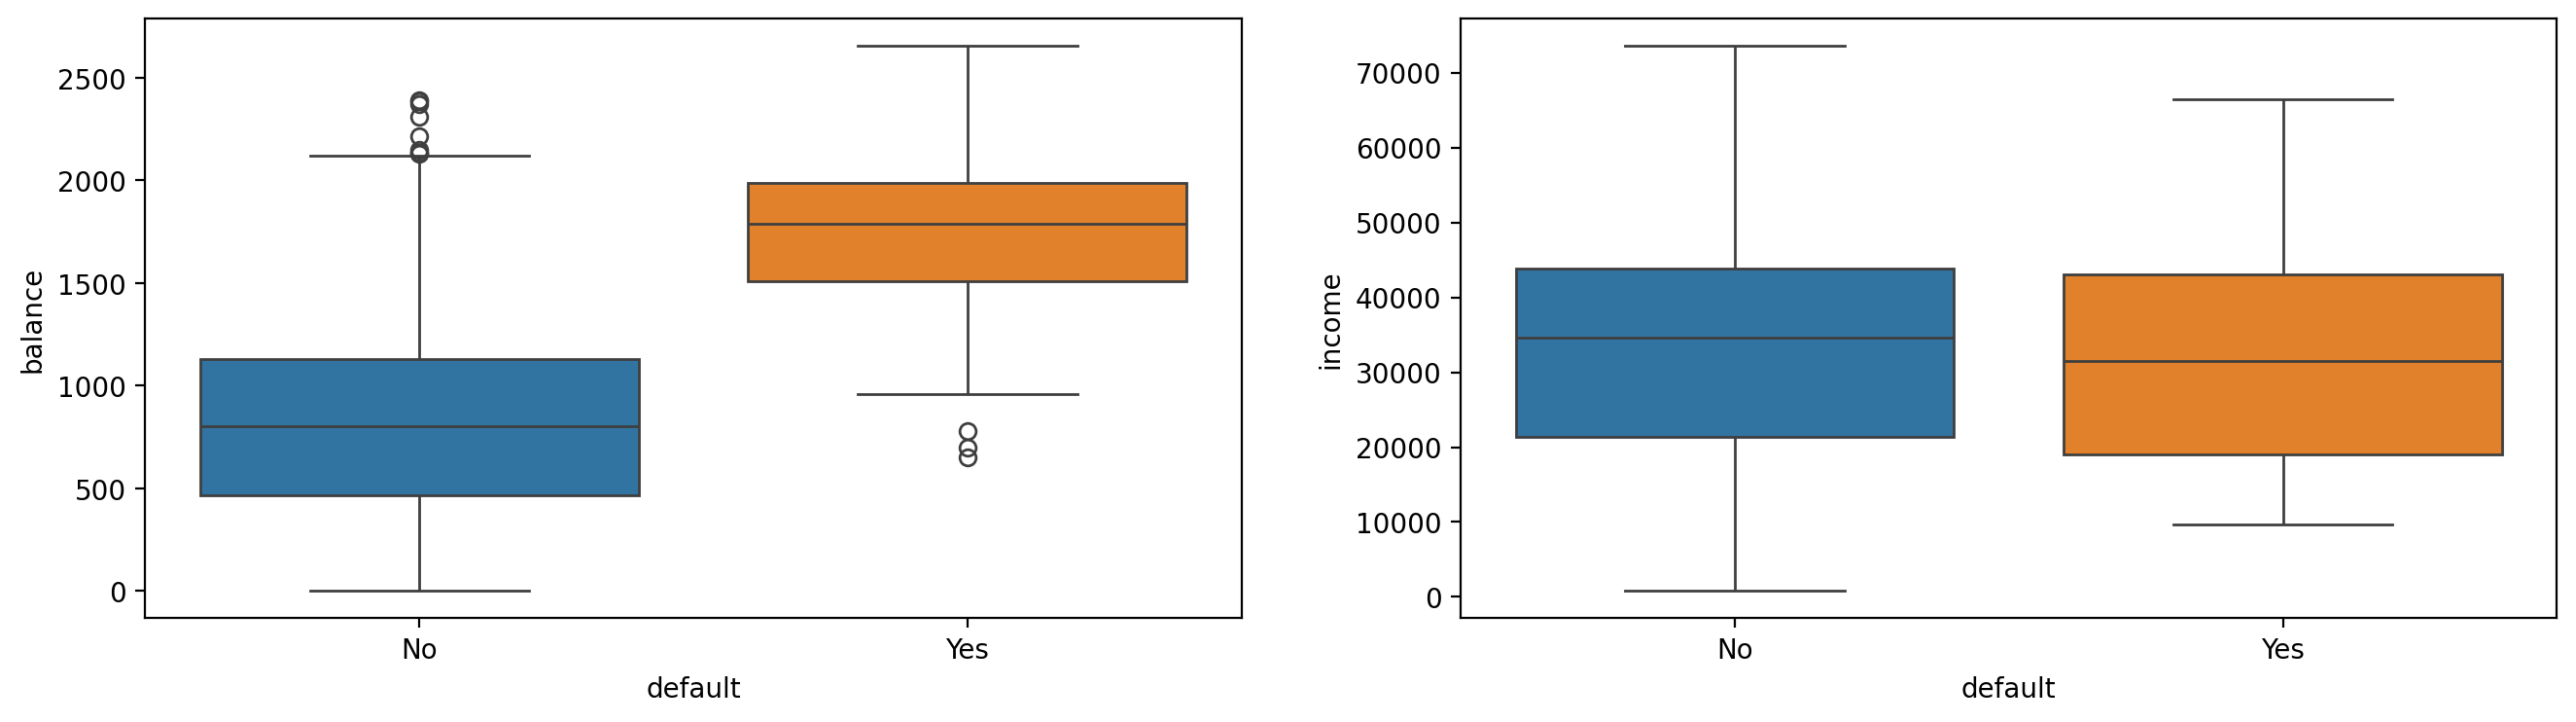

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (16, 4), dpi = (200))
for ax, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data = df, x = "default", y = col, ax = ax, hue = "default")

    

### Dummy encoding

In [9]:
df = pd.get_dummies(df, columns = ["default", "student"], drop_first = True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [10]:
df[["default_Yes", "student_Yes"]] = df[["default_Yes", "student_Yes"]].astype(int) #Gör om true/false till 1 resp 0. 
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


### Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("default_Yes", axis = 1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression(penalty= None)
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

(array([[ 2.88848257,  0.00619039, -0.29011374]]), array([-6.36187634]))

In [12]:
X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [16]:
y_train.sum()/len(X_train)

np.float64(0.03328358208955224)

In [13]:
test_sample = pd.DataFrame(
    {"balance": [1500, 1500], "income": [4000, 4000], "student_Yes": [1, 0]}
)

test_sample

,balance,income,student_Yes
0,1500,4000,1
1,1500,4000,0
